# Train and observe epscilon-greedy bandit

written by arutema47

Reinforcement Learning: An Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# e-greedy multi-armed bandit
class bandit():
    def __init__(self, runs=1000, log=100, eps=0, arms=10, init=2, ucb=0, target=[0.2, -0.8, 1.5, 0.3, 1.2, -1.5, -0.2, -0.7, 0.9, 0.5]):
        self.arms = arms
        self.target = np.array(target)
        self.q = np.zeros(arms)+init
        self.n = np.zeros(arms)
        self.rewards = 0
        self.runs = runs
        self.log = []
        self.log_freq = log
        self.e = eps
        self.ucb = ucb
    
    def run(self):
        # train loop
        for i in range(self.runs):
            ep = np.random.rand(1)
            # explore or exploit
            if ep<self.e:
                self.explore()
            else:
                self.exploit()

            if i%self.log_freq:
                self.log.append(self.rewards)
            
    def get_val(self, x):
        return np.random.randn(1)+self.target[x]
        
    def exploit(self):
        sel = np.argmax(self.q + self.ucb*np.sqrt(np.log(np.sum(self.n) / self.n)))
        get = self.get_val(sel)
        self.update(sel, get)
        
    def explore(self):
        sel = np.random.randint(self.arms-1)
        get = self.get_val(sel)
        self.update(sel, get)
    
    def update(self, sel, get):
        self.n[sel] += 1
        # calculate Q
        new_q = self.q[sel] + 1/self.n[sel] * (get - self.q[sel])
        self.q[sel] = new_q # update
        # for plot
        self.rewards = np.sum((self.q*self.n))/np.sum(self.n)

# Train

In [136]:
print("greedy")
greed = []
for i in range(10):
    model = bandit()
    model.run()
    greed.append(model.log)

greedy


C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


In [137]:
print("e=0.1")
e1 = []
for i in range(100):
    model = bandit(eps=0.1)
    model.run()
    e1.append(model.log)

e=0.1


C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


In [138]:
print("e=0.01")
e2 = []
for i in range(10):
    model = bandit(eps=0.01)
    model.run()
    e2.append(model.log)

e=0.01


C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


In [139]:
print("e=0.5")
e3 = []
for i in range(10):
    model = bandit(eps=0.5)
    model.run()
    e3.append(model.log)

e=0.5


C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


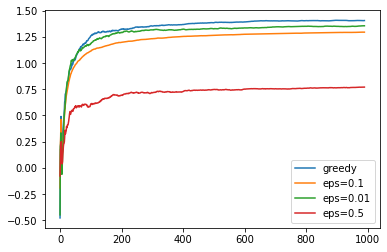

In [140]:
plt.plot(np.array(greed).mean(0), label="greedy")
plt.plot(np.array(e1).mean(0), label="eps=0.1")
plt.plot(np.array(e2).mean(0), label="eps=0.01")
plt.plot(np.array(e3).mean(0), label="eps=0.5")
plt.legend()

シードで結果がぜんぜん違うので100回試行を平均化

# Large initial values

In [98]:
print("greedy")
greed = []
for i in range(1):
    model = bandit(runs=10000)
    model.run()
    greed.append(model.log)

greedy


In [99]:
print("greedy")
greed2 = []
for i in range(1):
    model = bandit(runs=10000, init=5)
    model.run()
    greed2.append(model.log)

greedy


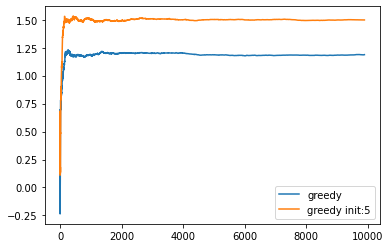

In [100]:
plt.plot(np.array(greed).mean(0), label="greedy")
plt.plot(np.array(greed2).mean(0), label="greedy init:5")
plt.legend()

# Upper-confidence bound

In [102]:
print("e=0.1")
e1 = []
for i in range(100):
    model = bandit(eps=0.1)
    model.run()
    e1.append(model.log)

e=0.1


C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply


In [103]:
print("ucb")
e2 = []
for i in range(100):
    model = bandit(eps=0.1, ucb=2)
    model.run()
    e2.append(model.log)

ucb


C:\Users\kyosh\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide


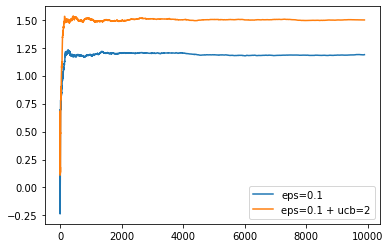

In [104]:
plt.plot(np.array(e1).mean(0), label="eps=0.1")
plt.plot(np.array(e2).mean(0), label="eps=0.1 + ucb=2")
plt.legend()